In [1]:
%reload_ext autoreload
%autoreload 2

##### Define ChEMBL and Papyrus versions

In [2]:
chembl_version = '31'
papyrus_version = '05.5'
papyrus_flavor = 'nostereo'

##### Define annotation round

In [3]:
annotation_round = 2

##### Define output and distance directories

In [4]:
from mutants_in_pcm import data_path
data_path.data_dir = '../data'

In [5]:
import os
from utils import get_mutant_analysis_path, get_distance_path
data_dir = '1_mutant_statistics'

In [6]:
type_analysis_dir = get_mutant_analysis_path(data_dir, 'type', annotation_round)
type_analysis_dir_organism = os.path.join(type_analysis_dir, 'organism')
distance_dir = get_distance_path(data_dir)

In [7]:
# Create organism analysis directory if it does not exist
if not os.path.exists(type_analysis_dir_organism):
    os.makedirs(type_analysis_dir_organism)

##### Import analysis functions

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from mutants_in_pcm.preprocessing import merge_chembl_papyrus_mutants
from mutants_in_pcm.mutant_analysis_type import (plot_heatmap_aa_change,
                                                 plot_bubble_aachange_distance,
                                                 plot_stacked_bars_mutation_type)
from mutants_in_pcm.mutant_analysis_family import obtain_chembl_family
from mutants_in_pcm.mutant_analysis_organism import annotate_organism_taxonomy

#### Mutation type analysis

In [10]:
# Read mutant annotated ChEMBL + Papyrus data
annotated_data = merge_chembl_papyrus_mutants(chembl_version, papyrus_version, papyrus_flavor, 1_000_000, annotation_round)
annotated_data

,target_id,connectivity,pchembl_value_Mean,Activity_class_consensus,source,SMILES,CID,accession,sequence,Year,UniProtID,Organism,HGNC_symbol
0,A0A045ISB3_F161S,ALIJNJWQOZKBPP,5.07,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN
1,A0A045ISB3_F161S,CXXIUJZSLPZZIM,5.27,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Cl)cc1,CHEMBL4647367,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN
2,A0A045ISB3_F161S,IPTNWUSXZLVWFT,5.04,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2F)cc1,CHEMBL4638011,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN
3,A0A045ISB3_F161S,LUVQLVJTOZVLDB,5.13,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Br)cc1,CHEMBL4637373,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN
4,A0A045ISB3_I203A,ALIJNJWQOZKBPP,7.37,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455834,Q9YQ12_WT,ZYLARFCKPNSSDA,6.17,"Series([], dtype: object)",ChEMBL31,CC(C)[C@H](NC(=O)COc1ccccc1)C(=O)N[C@@H](Cc1cc...,CHEMBL3331342,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN
455835,Q9YQ12_WT,ZYLFWZWRSRMGBQ,10.10,"Series([], dtype: object)",ChEMBL31,Nc1cccc(CN2C(=O)N(Cc3ccc4cn[nH]c4c3)C(Cc3ccccc...,CHEMBL2296983,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2013.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN
455836,Q9YQ12_WT,ZZCUJLFFPCGLAL,5.51,"Series([], dtype: object)",ChEMBL31,CC1(C)CC[C@]2(C(=O)NCCCCCC(=O)NCC(=O)O)CC[C@]3...,CHEMBL4530451,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2019.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN
455837,Q9YQ12_WT,ZZGMOZUZSAJAML,6.26,"Series([], dtype: object)",ChEMBL31,CC(C)c1nc(CN(C(=O)N[C@H](C(=O)N[C@H](CC[C@H](C...,CHEMBL3115161,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN


In [10]:
# Plot heatmaps with amino acid change counts
plot_heatmap_aa_change(annotated_data, type_analysis_dir, 'variant', None, None)
plot_heatmap_aa_change(annotated_data, type_analysis_dir, 'activity', None, None)

#### Enrich annotated data with ChEMBL families and taxonomical classifications

In [11]:
# Get ChEMBL families to extract protein family accession codes
chembl_families = obtain_chembl_family(chembl_version).fillna('Other')
kinases_accession_list = chembl_families[chembl_families['l2']=='Kinase']['accession'].tolist()
gpcrs_accession_list = chembl_families[chembl_families['l2'].str.contains('G protein-coupled receptor')]['accession'].tolist()

In [11]:
# Annotate data for the taxonomical classification based on domain (i.e. Virus, Bacteria, Archaea, or Eukaryota)
annotated_data_tax = annotate_organism_taxonomy(annotated_data)
annotated_data_tax

Fetched: 306 / 335


,target_id,connectivity,pchembl_value_Mean,Activity_class_consensus,source,SMILES,CID,accession,sequence,Year,UniProtID,Organism,HGNC_symbol,classification
0,A0A045ISB3_F161S,ALIJNJWQOZKBPP,5.07,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Bacteria
1,A0A045ISB3_F161S,CXXIUJZSLPZZIM,5.27,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Cl)cc1,CHEMBL4647367,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Bacteria
2,A0A045ISB3_F161S,IPTNWUSXZLVWFT,5.04,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2F)cc1,CHEMBL4638011,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Bacteria
3,A0A045ISB3_F161S,LUVQLVJTOZVLDB,5.13,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Br)cc1,CHEMBL4637373,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Bacteria
4,A0A045ISB3_I203A,ALIJNJWQOZKBPP,7.37,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Bacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455834,Q9YQ12_WT,ZYLARFCKPNSSDA,6.17,"Series([], dtype: object)",ChEMBL31,CC(C)[C@H](NC(=O)COc1ccccc1)C(=O)N[C@@H](Cc1cc...,CHEMBL3331342,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Virus
455835,Q9YQ12_WT,ZYLFWZWRSRMGBQ,10.10,"Series([], dtype: object)",ChEMBL31,Nc1cccc(CN2C(=O)N(Cc3ccc4cn[nH]c4c3)C(Cc3ccccc...,CHEMBL2296983,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2013.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Virus
455836,Q9YQ12_WT,ZZCUJLFFPCGLAL,5.51,"Series([], dtype: object)",ChEMBL31,CC1(C)CC[C@]2(C(=O)NCCCCCC(=O)NCC(=O)O)CC[C@]3...,CHEMBL4530451,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2019.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Virus
455837,Q9YQ12_WT,ZZGMOZUZSAJAML,6.26,"Series([], dtype: object)",ChEMBL31,CC(C)c1nc(CN(C(=O)N[C@H](C(=O)N[C@H](CC[C@H](C...,CHEMBL3115161,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Virus


##### Statistics per taxonomical groups

In [13]:
# Count organisms
annotated_data_tax.groupby(['classification'])['Organism'].nunique()

classification
Archaea       1
Bacteria     17
Eukaryota    14
Virus        14
Name: Organism, dtype: int64

In [14]:
# Count proteins
annotated_data_tax.groupby(['classification'])['accession'].nunique()

classification
Archaea        1
Bacteria      28
Eukaryota    275
Virus         28
Name: accession, dtype: int64

In [15]:
# Count proteins in most populated organism from each domain
annotated_data_tax[annotated_data_tax['Organism'].isin(['Homo sapiens (Human)','Human immunodeficiency virus 1',
                                                        'Escherichia coli (strain K12)'])].groupby(['Organism'])['accession'].nunique()

Organism
Escherichia coli (strain K12)       7
Homo sapiens (Human)              235
Human immunodeficiency virus 1      5
Name: accession, dtype: int64

In [16]:
# Count variants
annotated_data_tax.groupby(['classification'])['target_id'].nunique()

classification
Archaea         2
Bacteria      115
Eukaryota    1410
Virus         217
Name: target_id, dtype: int64

In [17]:
# Count variants in most populated organism from each domain
annotated_data_tax[annotated_data_tax['Organism'].isin(['Homo sapiens (Human)','Human immunodeficiency virus 1','Escherichia coli (strain K12)'])].groupby(['Organism'])['target_id'].nunique()

Organism
Escherichia coli (strain K12)       22
Homo sapiens (Human)              1225
Human immunodeficiency virus 1     119
Name: target_id, dtype: int64

In [18]:
# Count bioactivity data
annotated_data_tax.groupby(['classification'])['pchembl_value_Mean'].count()

classification
Archaea           2
Bacteria       3203
Eukaryota    429998
Virus         21972
Name: pchembl_value_Mean, dtype: int64

In [19]:
# Count bioactivity data in most populated organism from each domain
annotated_data_tax[annotated_data_tax['Organism'].isin(['Homo sapiens (Human)','Human immunodeficiency virus 1','Escherichia coli (strain K12)'])].groupby(['Organism'])['pchembl_value_Mean'].count()

Organism
Escherichia coli (strain K12)       1338
Homo sapiens (Human)              412797
Human immunodeficiency virus 1     15512
Name: pchembl_value_Mean, dtype: int64

In [20]:
# Check how many bioactivity datapoints are there per organism (with taxonomical annotation)
annotated_data_tax.groupby(['classification','Organism'])['pchembl_value_Mean'].count().reset_index()

,classification,Organism,pchembl_value_Mean
0,Archaea,Pyrococcus horikoshii (strain ATCC 700860 / DS...,2
1,Bacteria,Bacillus anthracis,67
2,Bacteria,Bacillus subtilis (strain 168),4
3,Bacteria,Bacteroides thetaiotaomicron (strain ATCC 2914...,28
4,Bacteria,Escherichia coli (strain K12),1338
5,Bacteria,Escherichia coli O127:H6 (strain E2348/69 / EPEC),7
6,Bacteria,Francisella tularensis subsp. tularensis (stra...,26
7,Bacteria,Lactococcus lactis subsp. cremoris (strain MG1...,23
8,Bacteria,Magnetospirillum gryphiswaldense,25
9,Bacteria,Mycobacterium tuberculosis,261


In [21]:
# Check how many bioactivity datapoints are there per organism and variant (with taxonomical annotation)
annotated_data_tax.groupby(['classification','Organism','target_id'])['pchembl_value_Mean'].count()

classification  Organism                                                                                target_id   
Archaea         Pyrococcus horikoshii (strain ATCC 700860 / DSM 12428 / JCM 9974 / NBRC 100139 / OT-3)  O59010_D405N      1
                                                                                                        O59010_L130W      1
Bacteria        Bacillus anthracis                                                                      Q81R22_F96I      18
                                                                                                        Q81R22_WT        31
                                                                                                        Q81R22_Y102F     18
                                                                                                                       ... 
Virus           Influenza B virus (strain B/Lee/1940)                                                   P03474_WT       182
               

#### Plot mutation type statistics taking into account taxonomical classifications and organisms

##### Accumulated number of variants with individual amino acid changes

###### Homo sapiens

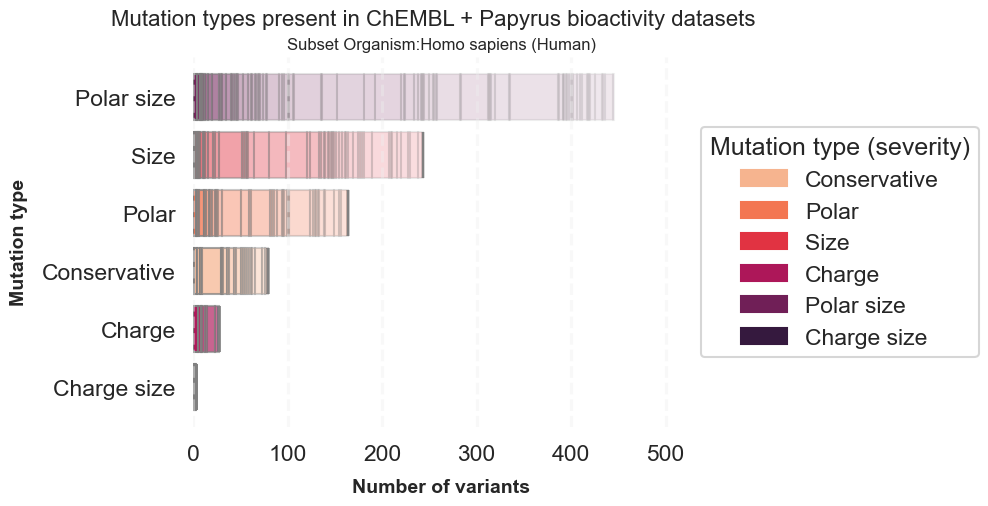

In [25]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'mutation_type', 'Organism', 'Homo sapiens (Human)', False)

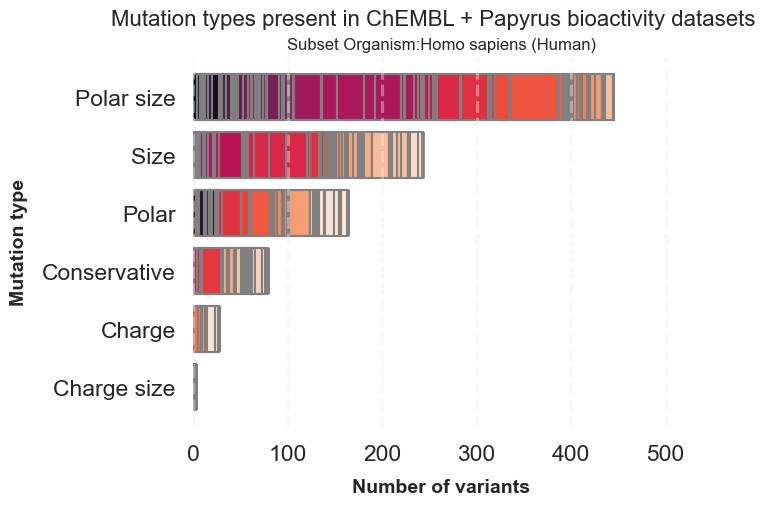

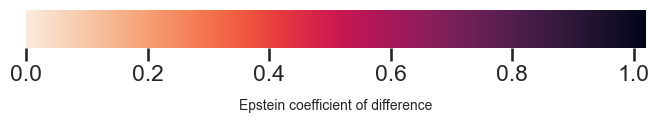

In [26]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'distance_matrix', 'Organism', 'Homo sapiens (Human)', False)

###### Bacteria

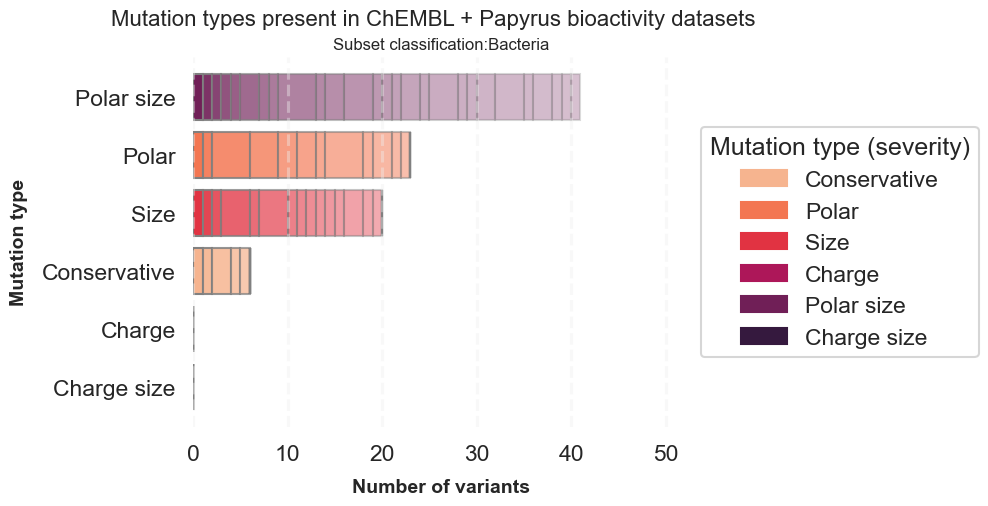

In [27]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'mutation_type', 'classification', 'Bacteria', False)

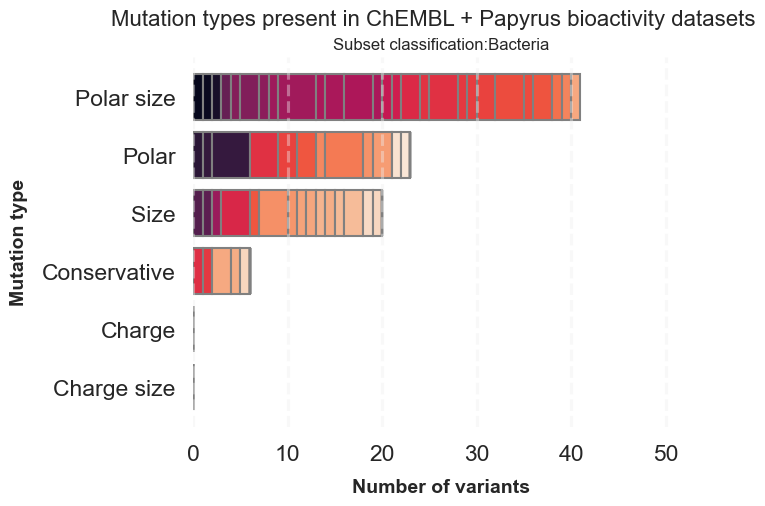

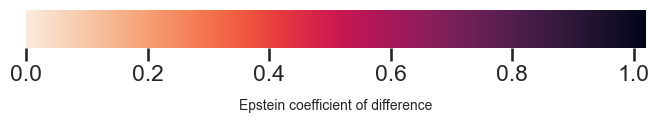

In [28]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'distance_matrix', 'classification', 'Bacteria', False)

###### Virus

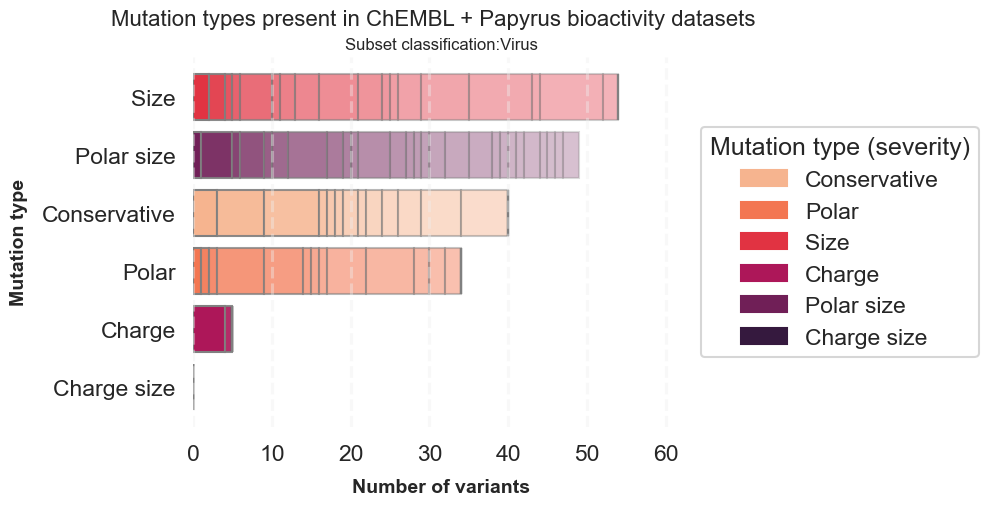

In [29]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'mutation_type', 'classification', 'Virus', False)

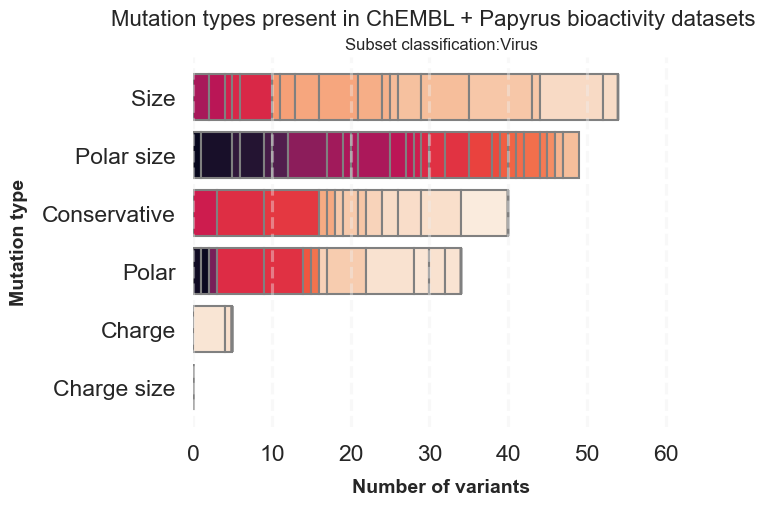

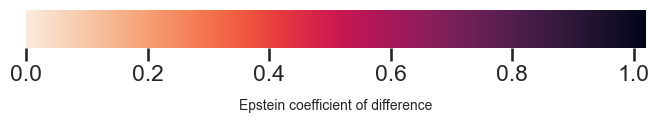

In [30]:
plot_stacked_bars_mutation_type(annotated_data_tax, type_analysis_dir_organism,
                                True, 'variant', 'distance_matrix', 'classification', 'Virus', False)

##### Correlation between position of mutation and how disruptive it is

Retrying in 3s
Fetched: 7 / 7
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distan

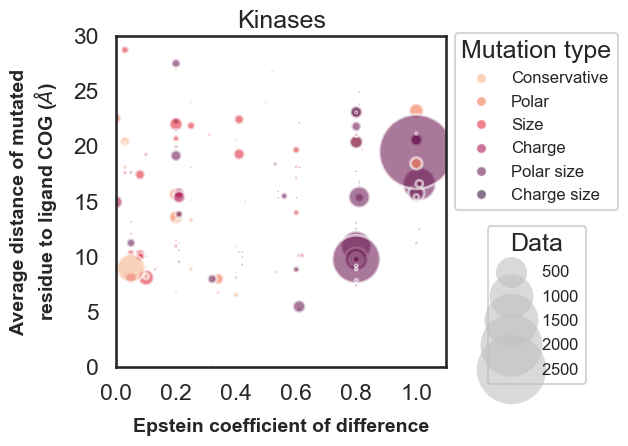

In [31]:
plot_bubble_aachange_distance(annotated_data, kinases_accession_list, 'Kinases', distance_dir,
                              type_analysis_dir, True,True)

Retrying in 3s
Fetched: 2 / 2
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distan

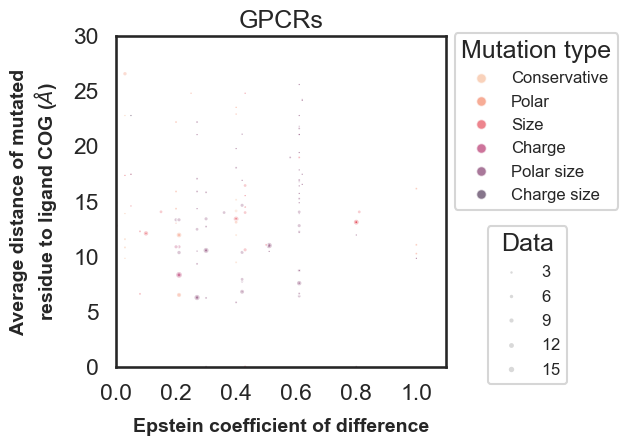

In [32]:
plot_bubble_aachange_distance(annotated_data, gpcrs_accession_list[:872], 'GPCRs', distance_dir,
                              type_analysis_dir, True,True)

Reading pre-computed distance results...
                   target_id aa_change mutation_type  pchembl_value_Mean  \
11        P00533_T790M_L858R        TM    polar_size                1190   
4               P00533_L858R        LR    polar_size                 564   
7               P00533_T790M        TM    polar_size                 275   
5               P00533_L861Q        LQ         polar                 108   
9   P00533_T790M_C797S_L858R        TM    polar_size                  88   
0               P00533_A750P        AP          size                  62   
2               P00533_G719C        GC         polar                  62   
6               P00533_P753S        PS    polar_size                  58   
3               P00533_G719S        GS    polar_size                  42   
10        P00533_T790M_L858M        TM    polar_size                  30   
8         P00533_T790M_C797S        TM    polar_size                  16   
1               P00533_C797S        CS         

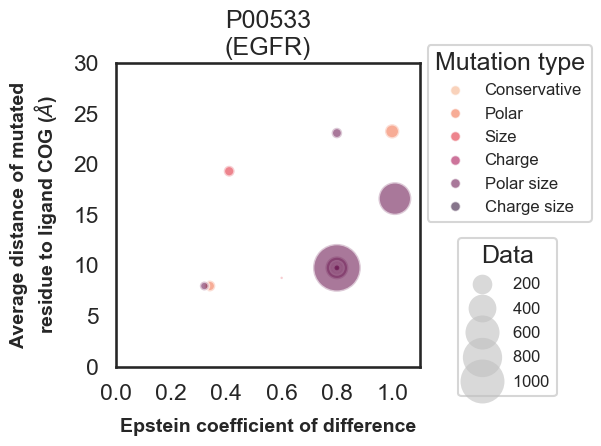

In [33]:
plot_bubble_aachange_distance(annotated_data, ['P00533'], 'EGFR', distance_dir,
                              type_analysis_dir, True,True)

Reading pre-computed distance results...
       target_id aa_change mutation_type  pchembl_value_Mean  distance_matrix  \
10  P00519_T315I        TI    polar_size                 472             0.80   
6   P00519_H396P        HP         polar                  94             0.80   
8   P00519_Q252H        QH         polar                  94             0.20   
13  P00519_Y253F        YF         polar                  91             0.20   
7   P00519_M351T        MT    polar_size                  89             0.80   
0   P00519_E255K        EK        charge                  86             0.00   
3   P00519_F317L        FL          size                  51             0.08   
2   P00519_F317I        FI          size                  47             0.08   
5   P00519_G250E        GE    polar_size                  23             0.56   
4   P00519_F359V        FV          size                   7             0.10   
11  P00519_T315N        TN          size                   7        

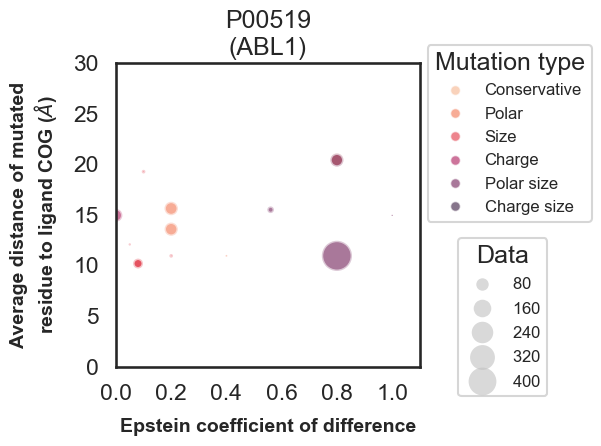

In [34]:
plot_bubble_aachange_distance(annotated_data, ['P00519'], 'ABL1', distance_dir,
                              type_analysis_dir, True,True)

Retrying in 3s
Failed to map 2 ID(s).
Fetched: 26 / 28
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Re

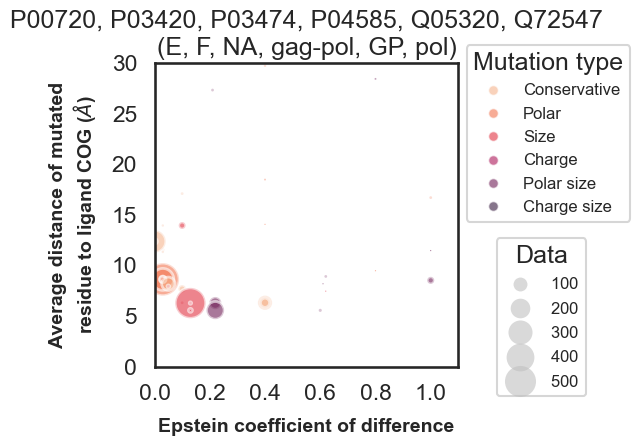

In [35]:
# Get all proteins from virus
virus_accession_list = annotated_data_tax[annotated_data_tax['classification']=='Virus'].accession.unique()\
    .tolist()
plot_bubble_aachange_distance(annotated_data, virus_accession_list, 'Virus', distance_dir,
                              type_analysis_dir_organism, True, True)

Fetched: 5 / 5
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
                        target_id aa_change mutation_type  pchembl_value_Mean  \
9                    Q72547_K103N        KN         polar                 550   
39                   Q72547_Y181C        YC          size                 480   
14                   Q72547_L100I        LI  conservative                 261   
10             Q72547_K103N_Y181C        KN         polar                 248   
44                   Q72547_Y188L        YL    polar_size                 162   
34                   Q72547_V106A        VA  conservative                 106   
2                    Q72547_E138K        EK        charge                  96   
29                   Q72547_P236L        PL  conservative                  93   
41                   Q72547_Y181I        YI    pola

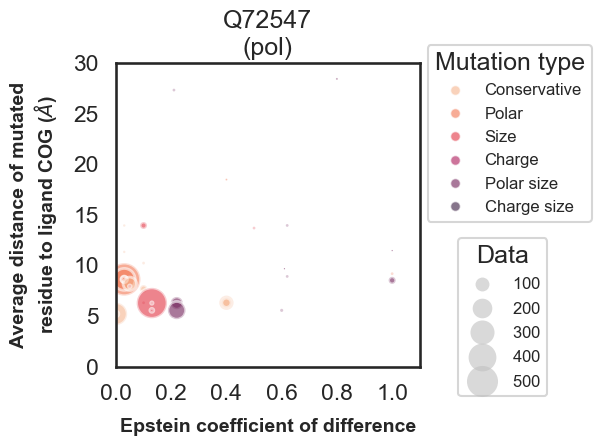

In [12]:
# Get proteins in HIV
hiv_accession_list = annotated_data[annotated_data['Organism'].str.contains('Human immunodeficiency virus 1', na=False)
]['accession'].unique().tolist()
plot_bubble_aachange_distance(annotated_data, hiv_accession_list, 'HIV', distance_dir,
                              type_analysis_dir_organism, True, True)

Retrying in 3s
Fetched: 28 / 28
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed dist

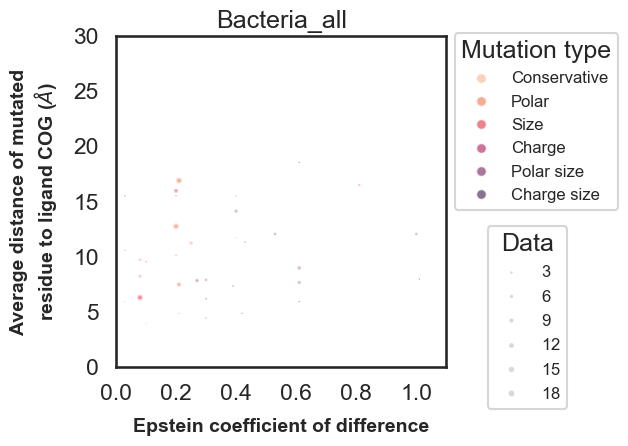

In [37]:
# Get all proteins from bacteria
bacteria_accession_list = annotated_data_tax[annotated_data_tax['classification']=='Bacteria'].accession.unique()\
    .tolist()
plot_bubble_aachange_distance(annotated_data, bacteria_accession_list, 'Bacteria_all', distance_dir,
                              type_analysis_dir_organism, True, True)

Retrying in 3s
Fetched: 7 / 7
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
Reading pre-computed distance results...
            target_id aa_change mutation_type  pchembl_value_Mean  \
1         P0A725_C63A        CA         polar                   7   
2  P0A725_Q202W_G210S        QW          size                   3   
4         P0ABQ4_T46A        TA         polar                   2   
5         P0ABQ4_T46N        TN          size                   2   
6         P0ABQ4_T46S        TS          size                   2   

   distance_matrix  mutant_dist  
1             0.25       11.239  
2             0.81       16.491  
4             0.40       15.518  
5             0.20       15.518  
6             0.03       15.518  


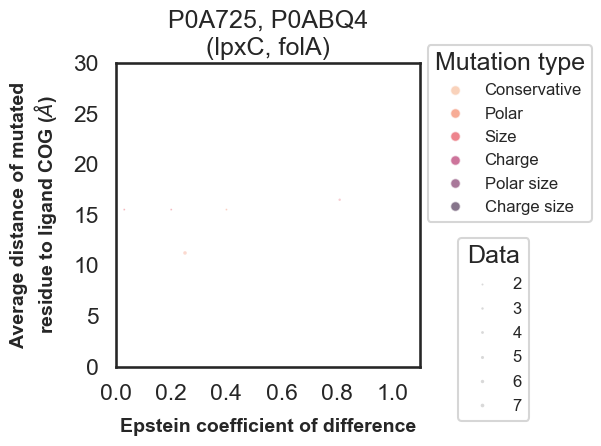

In [38]:
# Get all proteins from E.coli
ecoli_accession_list = annotated_data[annotated_data['Organism'] == 'Escherichia coli (strain K12)']['accession']\
    .unique().tolist()
plot_bubble_aachange_distance(annotated_data, ecoli_accession_list, 'EColi_All', distance_dir,
                              type_analysis_dir_organism, True, True)